# Shubham Sharma 
This code will be a basic code of classification in MNIST dataset

In [0]:
#Importing the functions
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt
from time import time
import numpy as np
from torchsummary import summary

In [13]:
#CHecking the number of GPU and then setting the GPU id
print(torch.cuda.current_device())#To know thw current active device
print(torch.cuda.get_device_capability())#the major and minor cuda capability of the device
device = torch.device('cuda')

0
(7, 5)


Before downloading the data, let us define what are the transformations we want to perform on our data before feeding it into the pipeline. In other words, you can consider it to be some kind of custom edit to are performing to the images so that all the images have the same dimensions and properties. We do it using **torchvision.transforms**.

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

**transforms.ToTensor()** :— converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.

**transforms.Normalize()**: — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

In [3]:
#Now downloading the data and passing it to the Dataloader

trainset = datasets.MNIST('.data/train', download=True, train=True, transform=transform)

valset = datasets.MNIST('.data/test', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20839362.83it/s]                            


Extracting .data/train/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 317265.90it/s]                           
0it [00:00, ?it/s]

Extracting .data/train/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5321340.63it/s]                           
8192it [00:00, 128429.38it/s]


Extracting .data/train/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting .data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...


  0%|          | 16384/9912422 [00:00<01:24, 117550.77it/s]

Done!


9920512it [00:00, 23965333.86it/s]                           


Extracting .data/test/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 331223.69it/s]
0it [00:00, ?it/s]

Extracting .data/test/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5265600.61it/s]                           
8192it [00:00, 130972.58it/s]


Extracting .data/test/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting .data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [4]:
#Let us see the shape of the images and labels
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


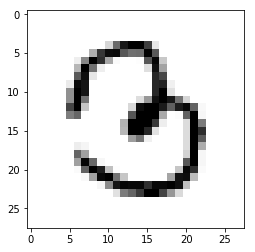

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [39]:
#Making the model
class Net(nn.Module):
  
  def __init__(self):
    super(Net,self).__init__()
    # 1 input image channel, 6 output image channel, 3x3 square convolution
    self.conv1=nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=1, padding=1)
    self.conv2=nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
    self.max1=nn.MaxPool2d(kernel_size=(2,2), stride=2)
    
    #Defining fully connected laYers
    self.fc1= nn.Linear(14*14*16,100)
    self.fc2= nn.Linear(100,10)
    
    #Defining activations
    self.relu = nn.ReLU()
  
  def forward(self,x):
    y=self.conv1(x)
    y=self.relu(y)
    y=self.conv2(y)
    y=self.relu(y)
    y=self.max1(y)
    y=y.view(-1, 14*14*16)
    y=self.fc1(y)
    y=self.relu(y)
    y=self.fc2(y)
    return y

##########################################################################
model = Net().to(device)#not necessary to add to device
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           1,168
              ReLU-4           [-1, 16, 28, 28]               0
         MaxPool2d-5           [-1, 16, 14, 14]               0
            Linear-6                  [-1, 100]         313,700
              ReLU-7                  [-1, 100]               0
            Linear-8                   [-1, 10]           1,010
Total params: 315,958
Trainable params: 315,958
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.31
Params size (MB): 1.21
Estimated Total Size (MB): 1.52
----------------------------------------------------------------


In [0]:
lr=1e-2
num_of_epochs=20
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)  


In [43]:
#Training the model
total_step = len(trainloader)
for epochs in range(num_of_epochs):
  for i, (images, labels) in enumerate(trainloader):  
    #CHECK THE SHAPE OF BOTH IMAGES AND LABELS
    images = images.to(device)
    labels = labels.to(device)  
    
    #Forward pass
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    
    # Backpropagation and then optimization
    optimizer.zero_grad()#Initially setting the gradient values to zero so backward() can find the gradient
    loss.backward()#backpropagate and then optimize
    optimizer.step()
    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
             .format(epochs+1, num_of_epochs, i+1, total_step, loss.item()))

    
    
    

Epoch [1/20], Step [100/938], Loss: 0.0852
Epoch [1/20], Step [200/938], Loss: 0.1205
Epoch [1/20], Step [300/938], Loss: 0.3800
Epoch [1/20], Step [400/938], Loss: 0.1782
Epoch [1/20], Step [500/938], Loss: 0.2178
Epoch [1/20], Step [600/938], Loss: 0.2247
Epoch [1/20], Step [700/938], Loss: 0.0387
Epoch [1/20], Step [800/938], Loss: 0.0404
Epoch [1/20], Step [900/938], Loss: 0.0305
Epoch [2/20], Step [100/938], Loss: 0.0677
Epoch [2/20], Step [200/938], Loss: 0.1785
Epoch [2/20], Step [300/938], Loss: 0.0210
Epoch [2/20], Step [400/938], Loss: 0.0393
Epoch [2/20], Step [500/938], Loss: 0.0344
Epoch [2/20], Step [600/938], Loss: 0.0166
Epoch [2/20], Step [700/938], Loss: 0.0716
Epoch [2/20], Step [800/938], Loss: 0.0692
Epoch [2/20], Step [900/938], Loss: 0.0141
Epoch [3/20], Step [100/938], Loss: 0.0054
Epoch [3/20], Step [200/938], Loss: 0.0051
Epoch [3/20], Step [300/938], Loss: 0.0411
Epoch [3/20], Step [400/938], Loss: 0.0464
Epoch [3/20], Step [500/938], Loss: 0.1044
Epoch [3/20

In [48]:
#For Testing
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  correct=0
  total=0
  for images, labels in valloader:
    images=images.to(device)
    labels=labels.to(device)
    outputs= model(images)
    #outputs.data is the output of softmax layer
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

  

Accuracy of the network on the 10000 test images: 98.06 %


In [50]:
# Save the model checkpoint
torch.save(model, './model')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
